## Getting started - how to pass images into Claude

**Model** : 

In [ ]:
!pip install langchain --quiet 
!pip install boto3 --quiet 
!pip install botocore --quiet 
!pip install Pillow --quiet 
%pip install anthropic IPython 

In [123]:
import boto3
import json
import time
import base64
from PIL import Image
import io
from IPython.display import Image
from IPython.display import display
import ipywidgets as widgets
from skimage import io

In [124]:
#initialize bedrock client for given region and endpoint. Change as per your region

bedrock_client = boto3.client(
    service_name='bedrock-runtime', 
    region_name='us-west-2'
)

In [125]:
# Function to convert image to base64
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
    return base64_string

In [127]:
##### Interact with a large language model (LLM) to generate text 
# based on a prompt.
#
# Arguments:
#   prompt: The text prompt to provide to the LLM.
#   llm_type: The name of the LLM to use'. 
#
# Returns:
#   The text generated by the LLM in response to the prompt.
#   
# This function:
# 1. Prints the llm_type for debugging.
# 2. Formats the prompt into the JSON payload expected by each LLM API.
# 3. Specifies the parameters for text generation like max tokens, temp.
# 4. Calls the Bedrock client to invoke the LLM model API. 
# 5. Parses the response to extract the generated text.
# 6. Returns the generated text string.

def interactWithLLM(prompt,image,llm_type):
	
    if llm_type == 'anthropic.claude-3-sonnet':
        print("**THE LLM TYPE IS -->" + llm_type)
        body = json.dumps({
                          "anthropic_version": "bedrock-2023-05-31",
                          "max_tokens": 1000,
                          "messages": [
                            {
                              "role": "user",
                              "content": [
                                {
                                  "type": "image",
                                  "source": {
                                    "type": "base64",
                                    "media_type": "image/jpeg",
                                    "data": image
                                  }
                                },
                                {
                                  "type": "text",
                                  "text": prompt
                                }
                              ]
                            }
                          ]
                        }) 
        modelId = 'anthropic.claude-3-sonnet-20240229-v1:0' # change this to use a different version from the model provider
        accept = 'application/json'
        contentType = 'application/json'
        start_time = time.time()
        response = bedrock_client.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
         # Record the end time
        end_time = time.time()

        # Calculate the runtime
        runtime = end_time - start_time
        print(f"The runtime of the invoke_model was {runtime:.2f} seconds.")
        
        response_body = json.loads(response.get('body').read())
        response_text = response_body.get('content')[0]['text']

        return response_text

In [128]:
llm_type = 'anthropic.claude-3-sonnet'

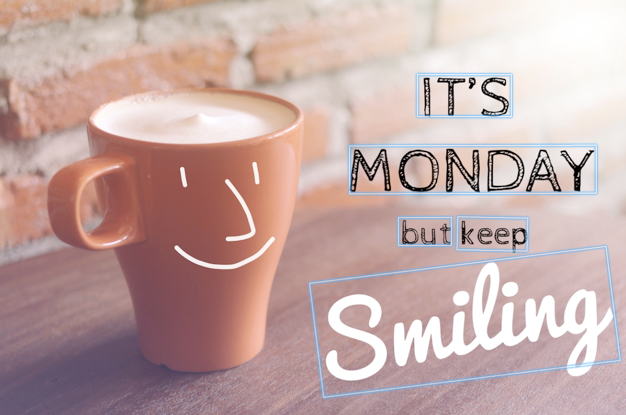

In [131]:
# Example usage
image_path = './image_text.png'  # Specify the path to your image
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [132]:
response_text = interactWithLLM("What is in this image?",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 4.99 seconds.
response_text --- 
This image depicts a cheerful, motivational scene related to starting the week on a positive note. The main elements are:

1. A ceramic mug or cup filled with a hot beverage, likely coffee or tea, with a smiley face drawn on it.

2. The words "IT'S MONDAY" composed of individual letter blocks or tiles, acknowledging the start of the new week.

3. A small sign or plaque that says "but keep Smiling", encouraging a happy and optimistic attitude.

The background appears to be a rustic brick wall surface, lending a cozy, casual vibe to the overall image composition. The combination of the smiley mug, Monday text, and "keep Smiling" message seems to convey an uplifting sentiment to embrace the start of the week with a smile and positive mindset.


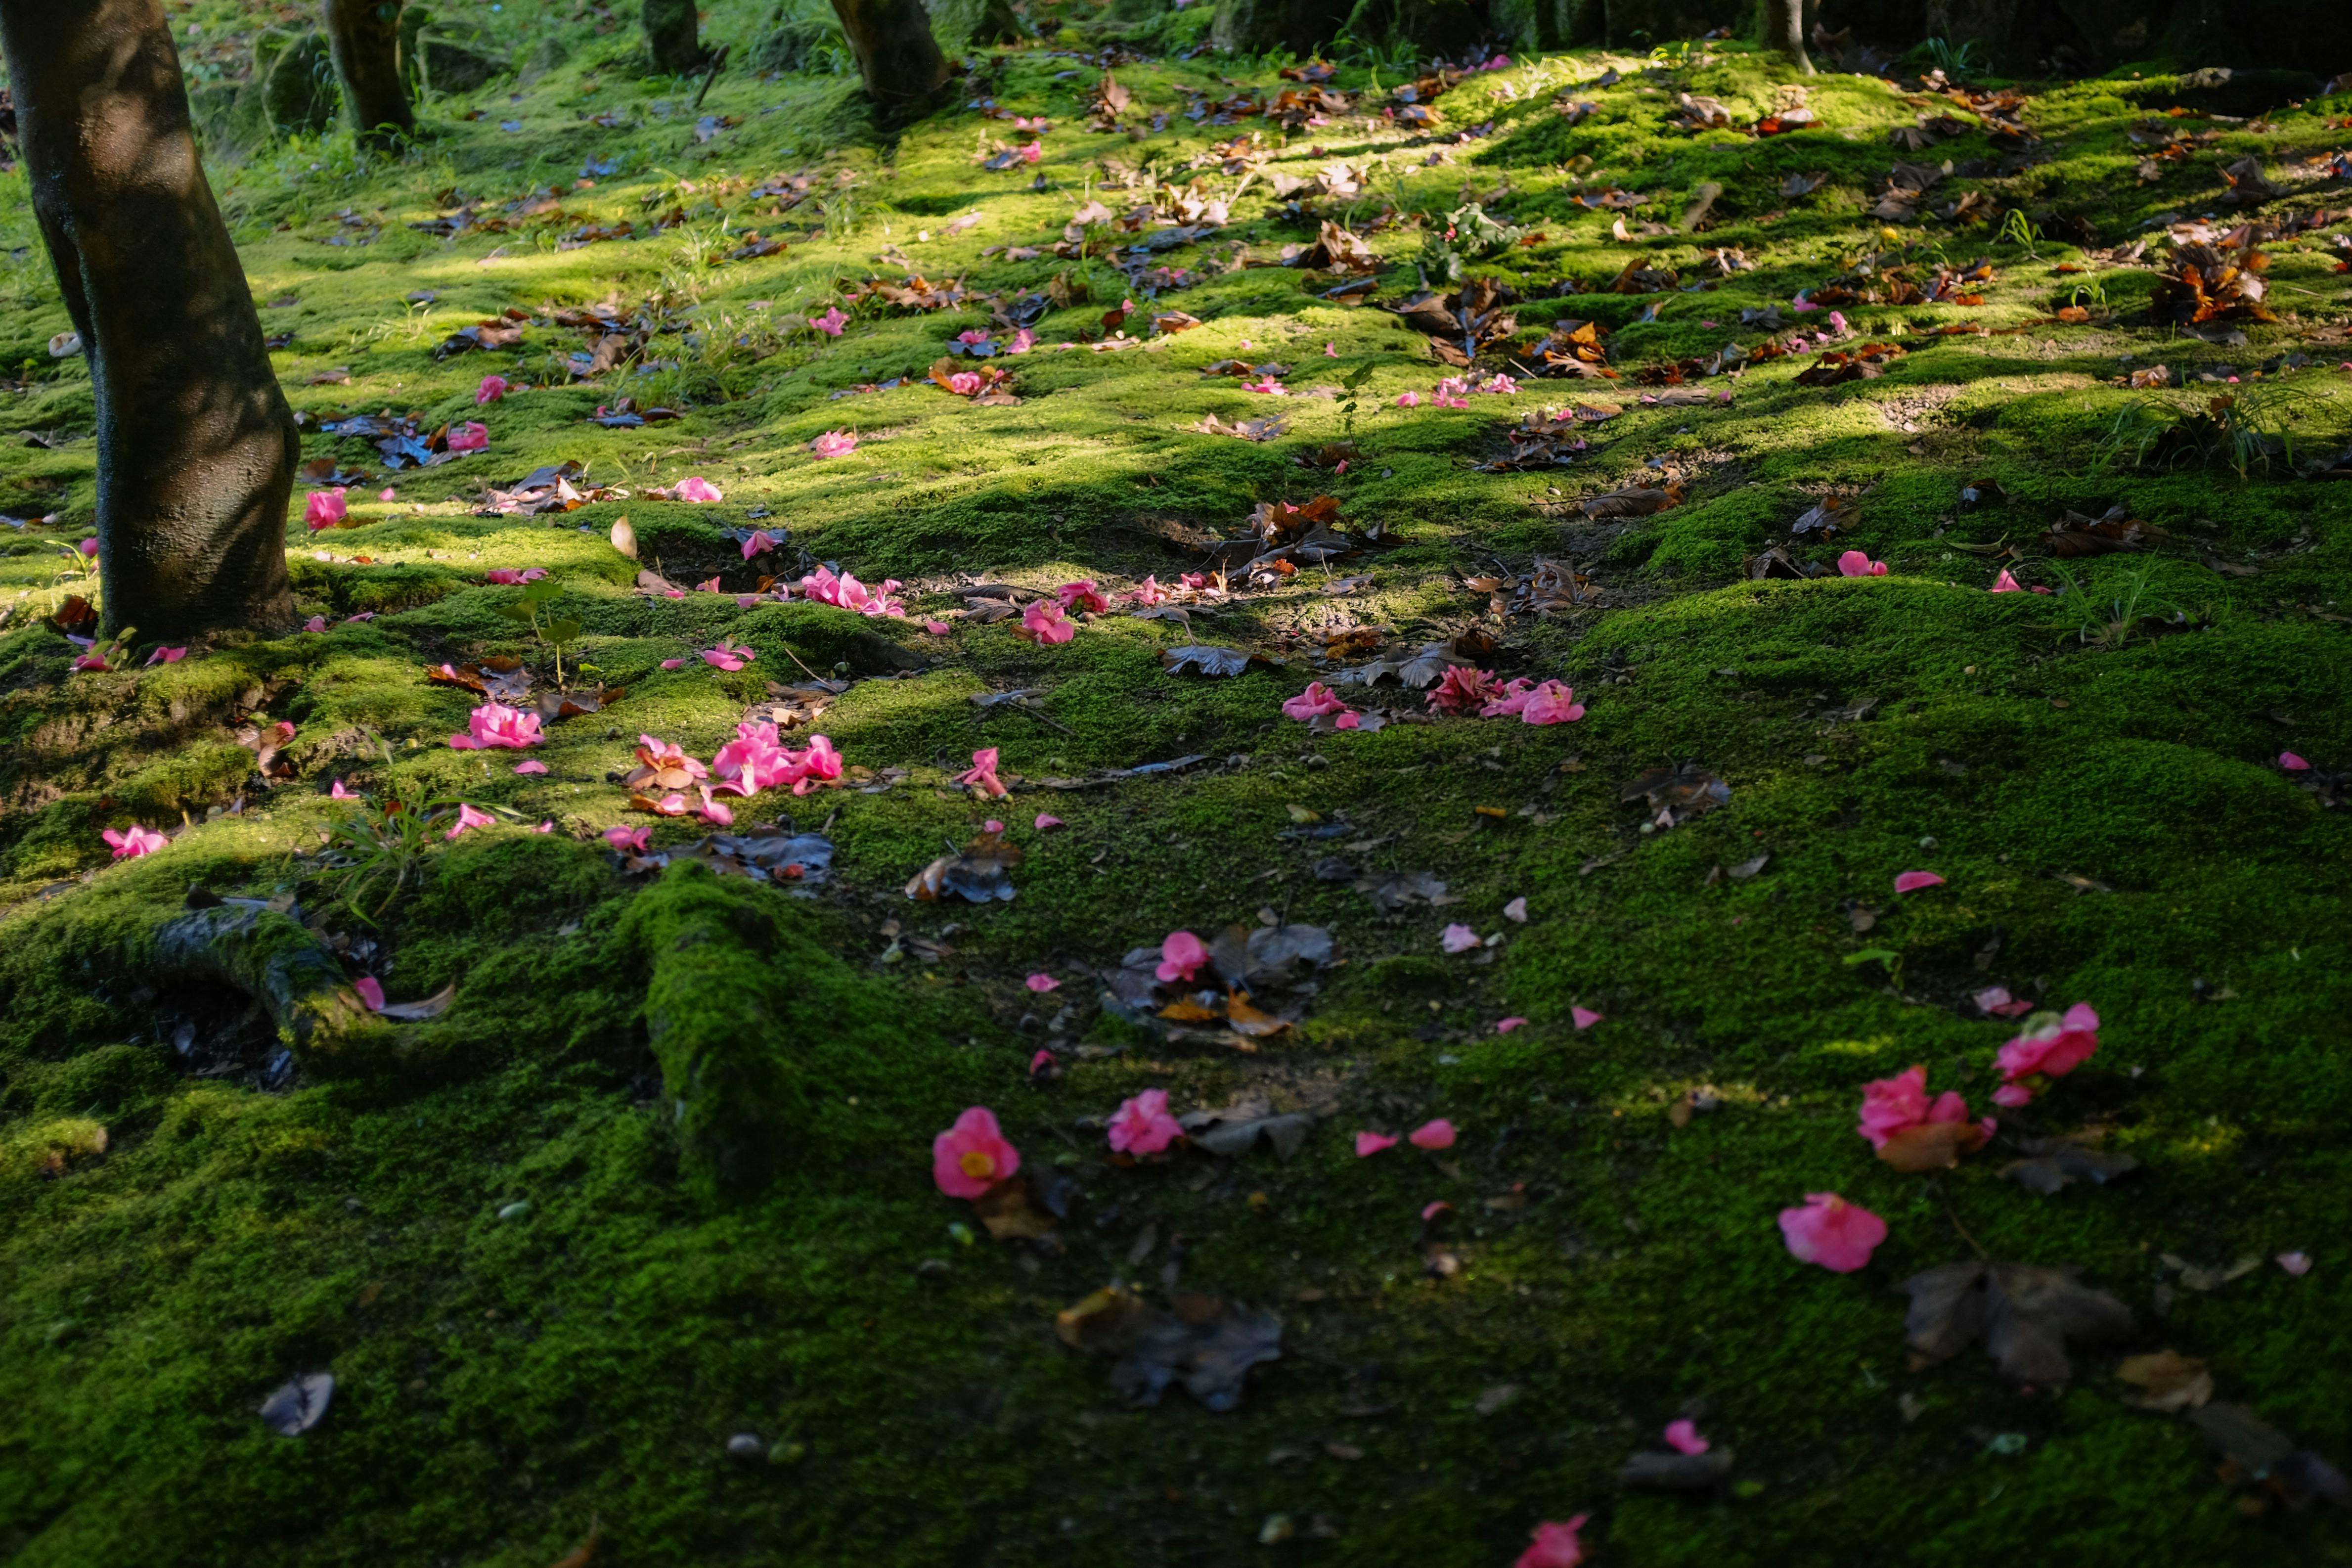

In [133]:
image_path = 'pexels-alisa-velieva-20165766.jpg'  # Specify the path to your image
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [134]:
response_text = interactWithLLM("What is in this image?",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 4.13 seconds.
response_text --- 
This image depicts a lush, moss-covered forest floor strewn with fallen pink flower petals. The vibrant green moss contrasts beautifully with the scattered pink petals, creating a serene and enchanting natural scene. Tree trunks can be seen in the background, surrounded by ferns and other undergrowth typical of a damp, shaded woodland environment. The image conveys a sense of tranquility and the ephemeral beauty found in nature's cyclical patterns of growth and decay.


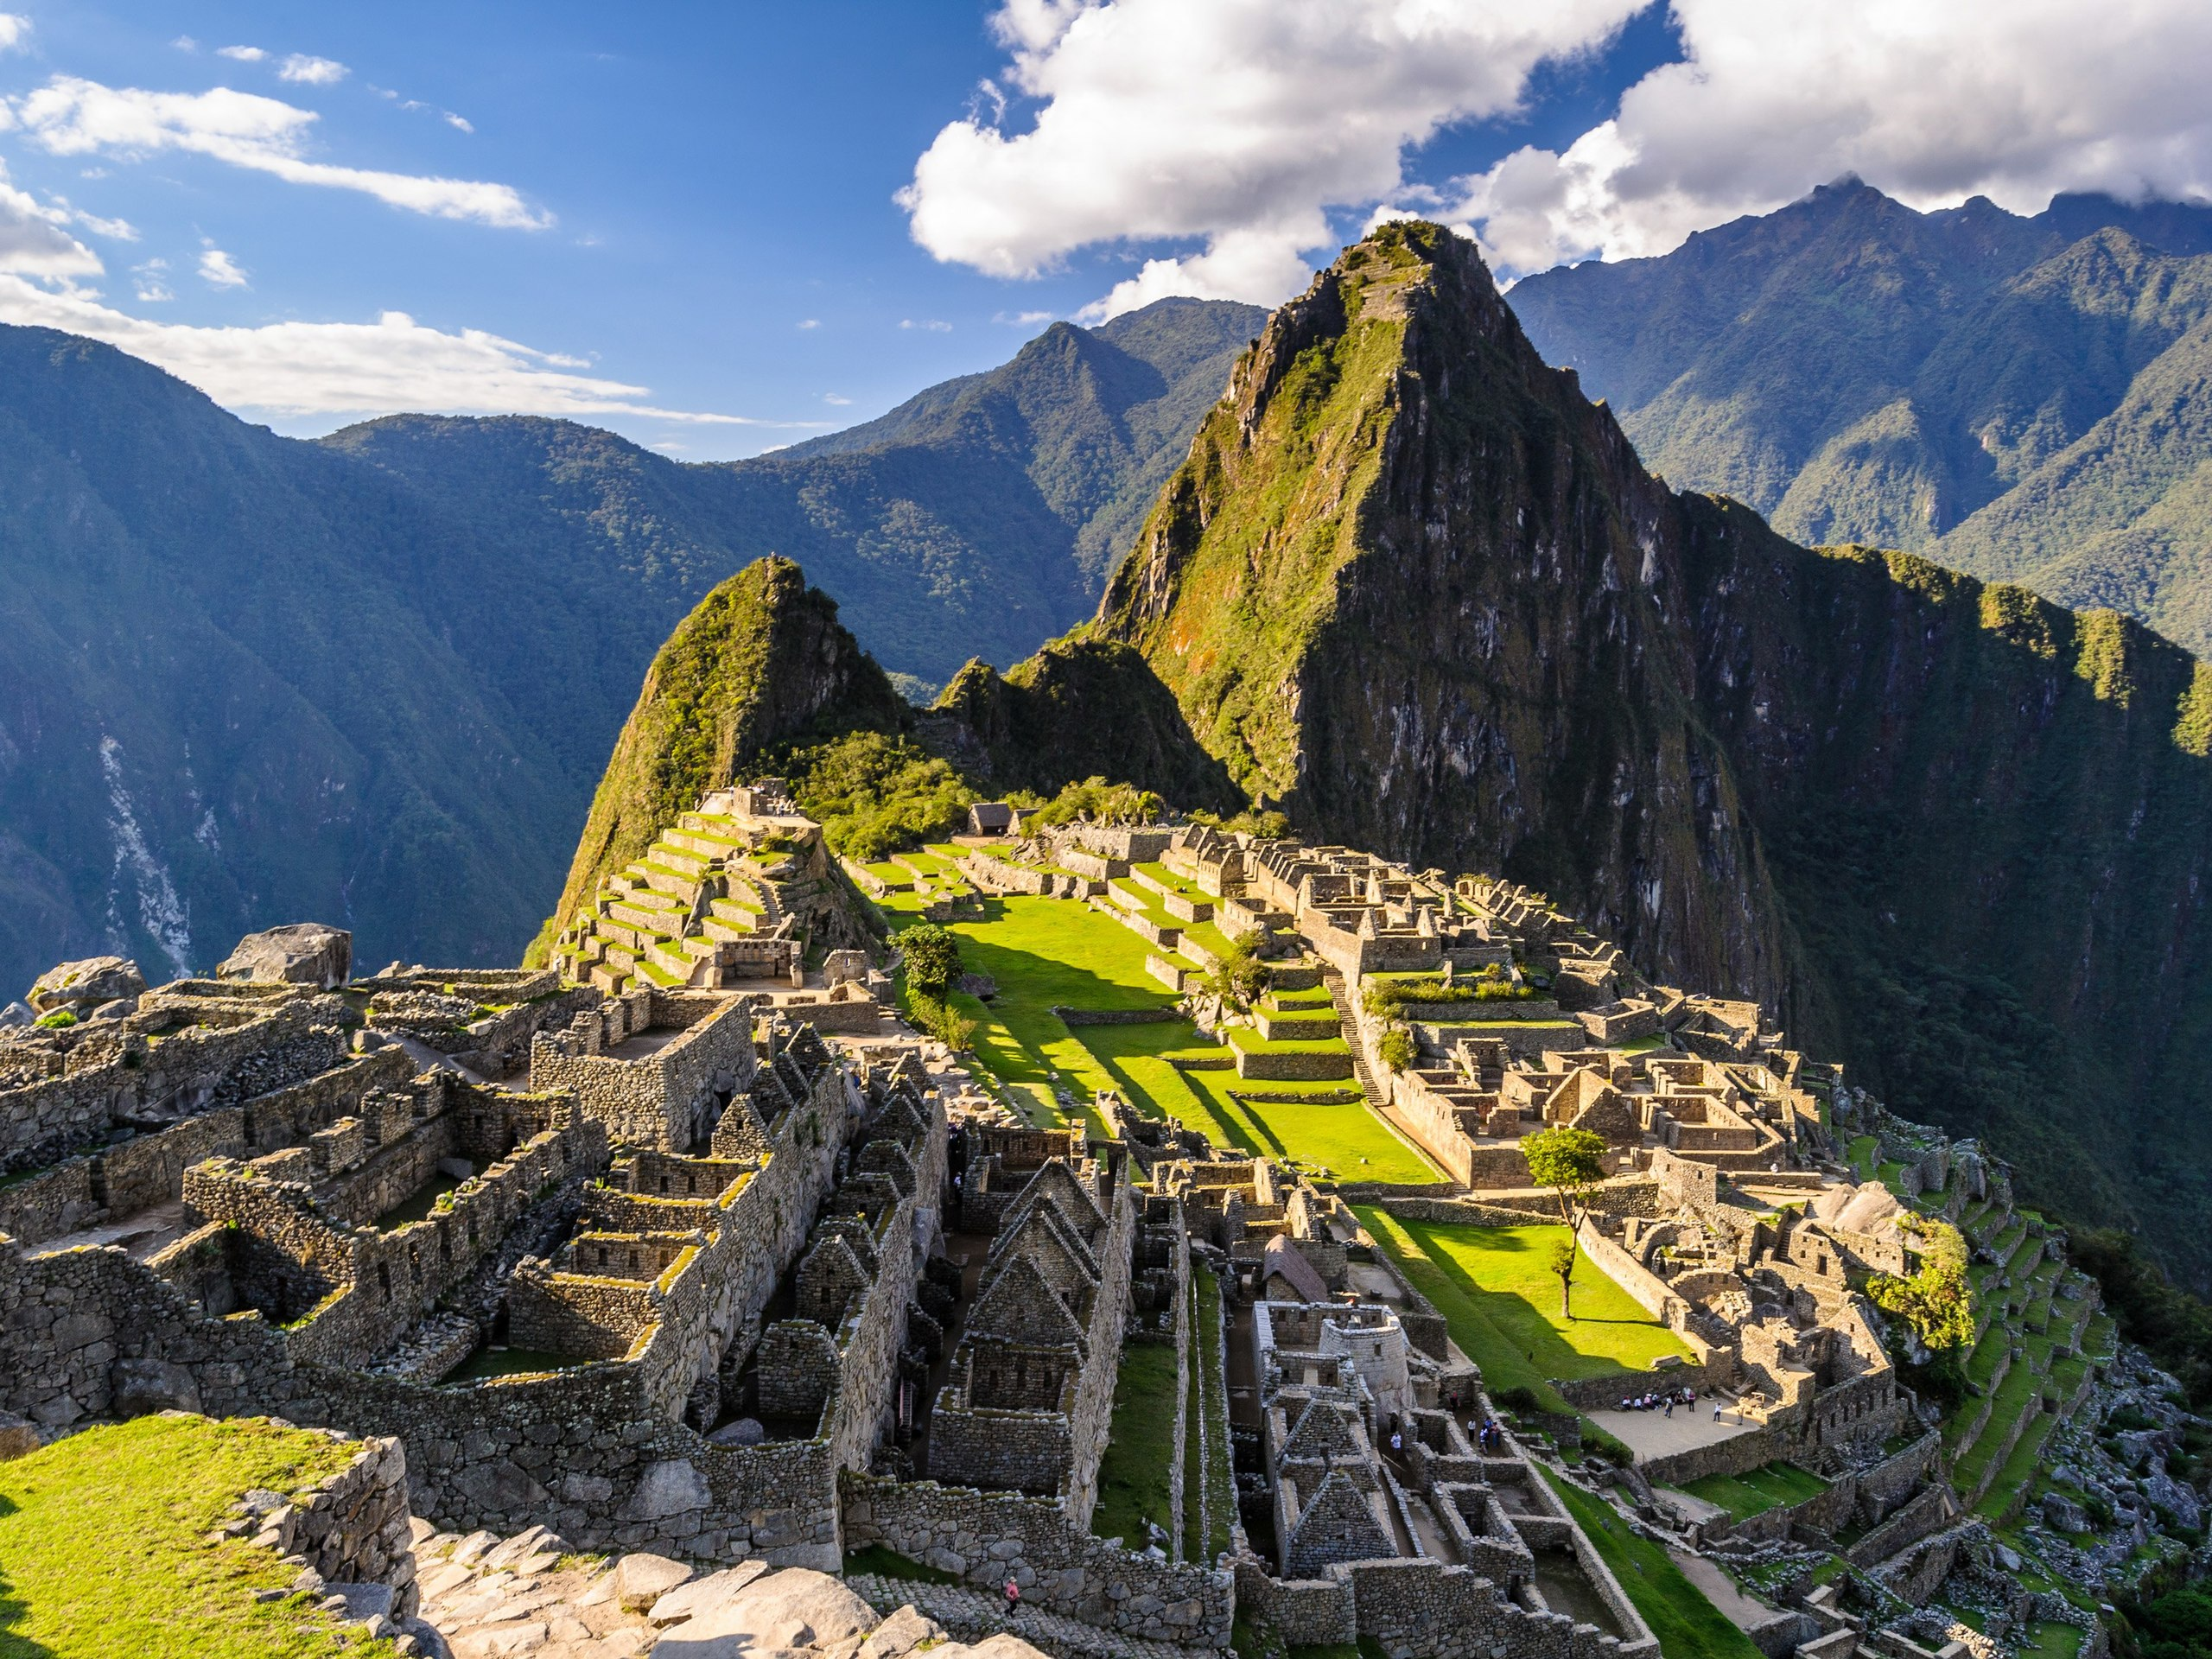

In [135]:
image_path = 'Machu_Picchu,_Peru_(2018).jpg'  # Specify the path to your image
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [136]:
response_text = interactWithLLM("What is in this image?",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 5.92 seconds.
response_text --- 
This image depicts the famous Incan citadel of Machu Picchu, an iconic archaeological site in Peru. Machu Picchu is situated atop a mountain ridge in the Andes, surrounded by towering peaks and deep valleys. The ruins consist of remarkably preserved stone structures and terraced gardens, showcasing the advanced engineering and architectural skills of the Incan civilization.

The image captures the grandeur of Machu Picchu, with its iconic peak of Huayna Picchu rising majestically in the background against a vibrant blue sky with wispy clouds. The ruins themselves occupy a prominent ridge, with numerous stone buildings, plazas, and agricultural terraces precisely constructed on the mountain slopes. The lush green terraces and vegetation provide a striking contrast to the weathered stone structures, creating a visually stunning scene that exemplifies the harmonious relation

### Transcribing typed text
The advantage of using Claude 3 over traditional OCR systems is that you can specify exactly what you want to transcribe due to Claude 3's advanced reasoning capabilities. For this image, let’s transcribe just the code in the answer.

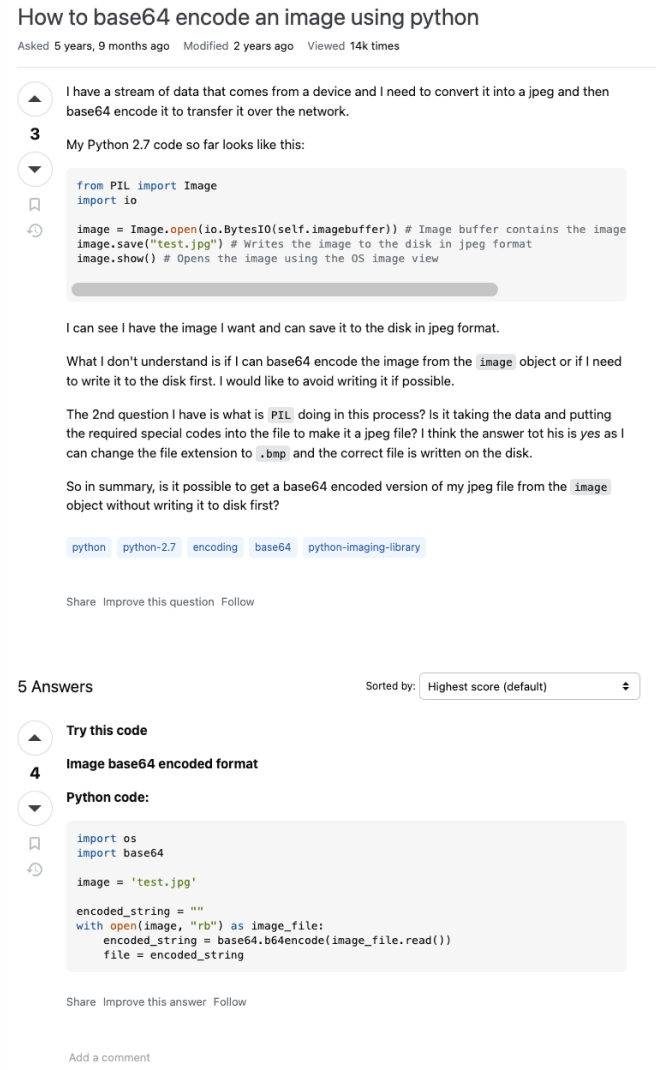

In [137]:
image_path = './images/transcribe/stack_overflow.png'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [138]:
response_text = interactWithLLM("Transcribe the code in the answer. Only output the code.",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 1.83 seconds.
response_text --- 
import os
import base64

image = 'test.jpg'

encoded_string = ""
with open(image, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
file = encoded_string


### Transcribing handwritten text
That's good but let's try something a little harder. Claude 3 excels at transcribing handwritten text as well. Let's ask Claude 3 to transcribe this handwritten prescription note.

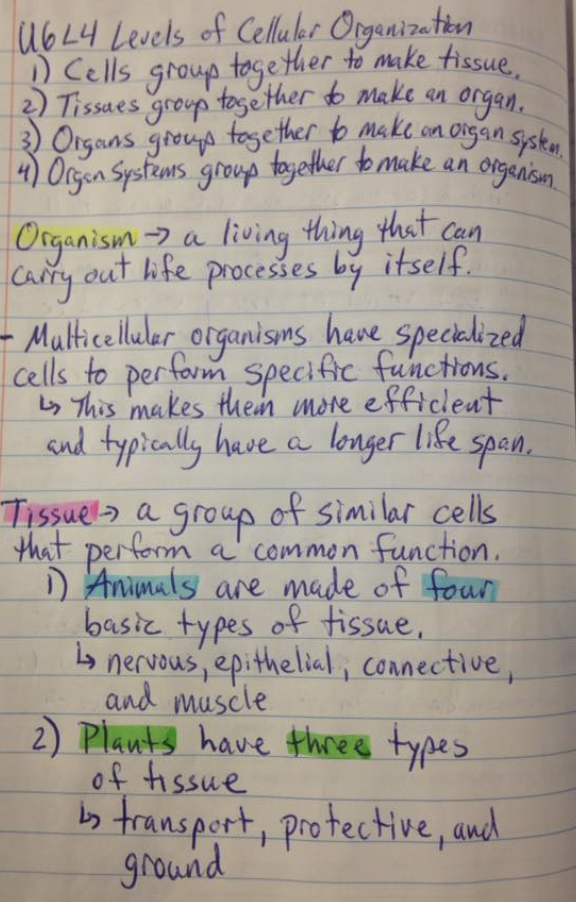

In [139]:
image_path = './images/transcribe/school_notes.png'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [140]:
response_text = interactWithLLM("Transcribe this text. Only output the text and nothing else.",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 4.62 seconds.
response_text --- 
ILC 4 Levels of Cellular Organization
1) Cells group together to make tissue.
2) Tissues group together to make an organ.
3) Organs group together to make an organ system.
4) Organ systems group together to make an organism.

Organism → a living thing that can carry out life processes by itself.

Multicellular organisms have specialized cells to perform specific functions. b This makes them more efficient and typically have a longer life span.

Tissue → a group of similar cells that perform a common function.
1) Animals are made of four basic types of tissue.
b nervous, epithelial, connective, and muscle
2) Plants have three types of tissue.
b transport, protective, and ground


### Transcribing forms

How about we try a combination of typed and handwritten text? This is common across a variety of documents like insurance and report forms.

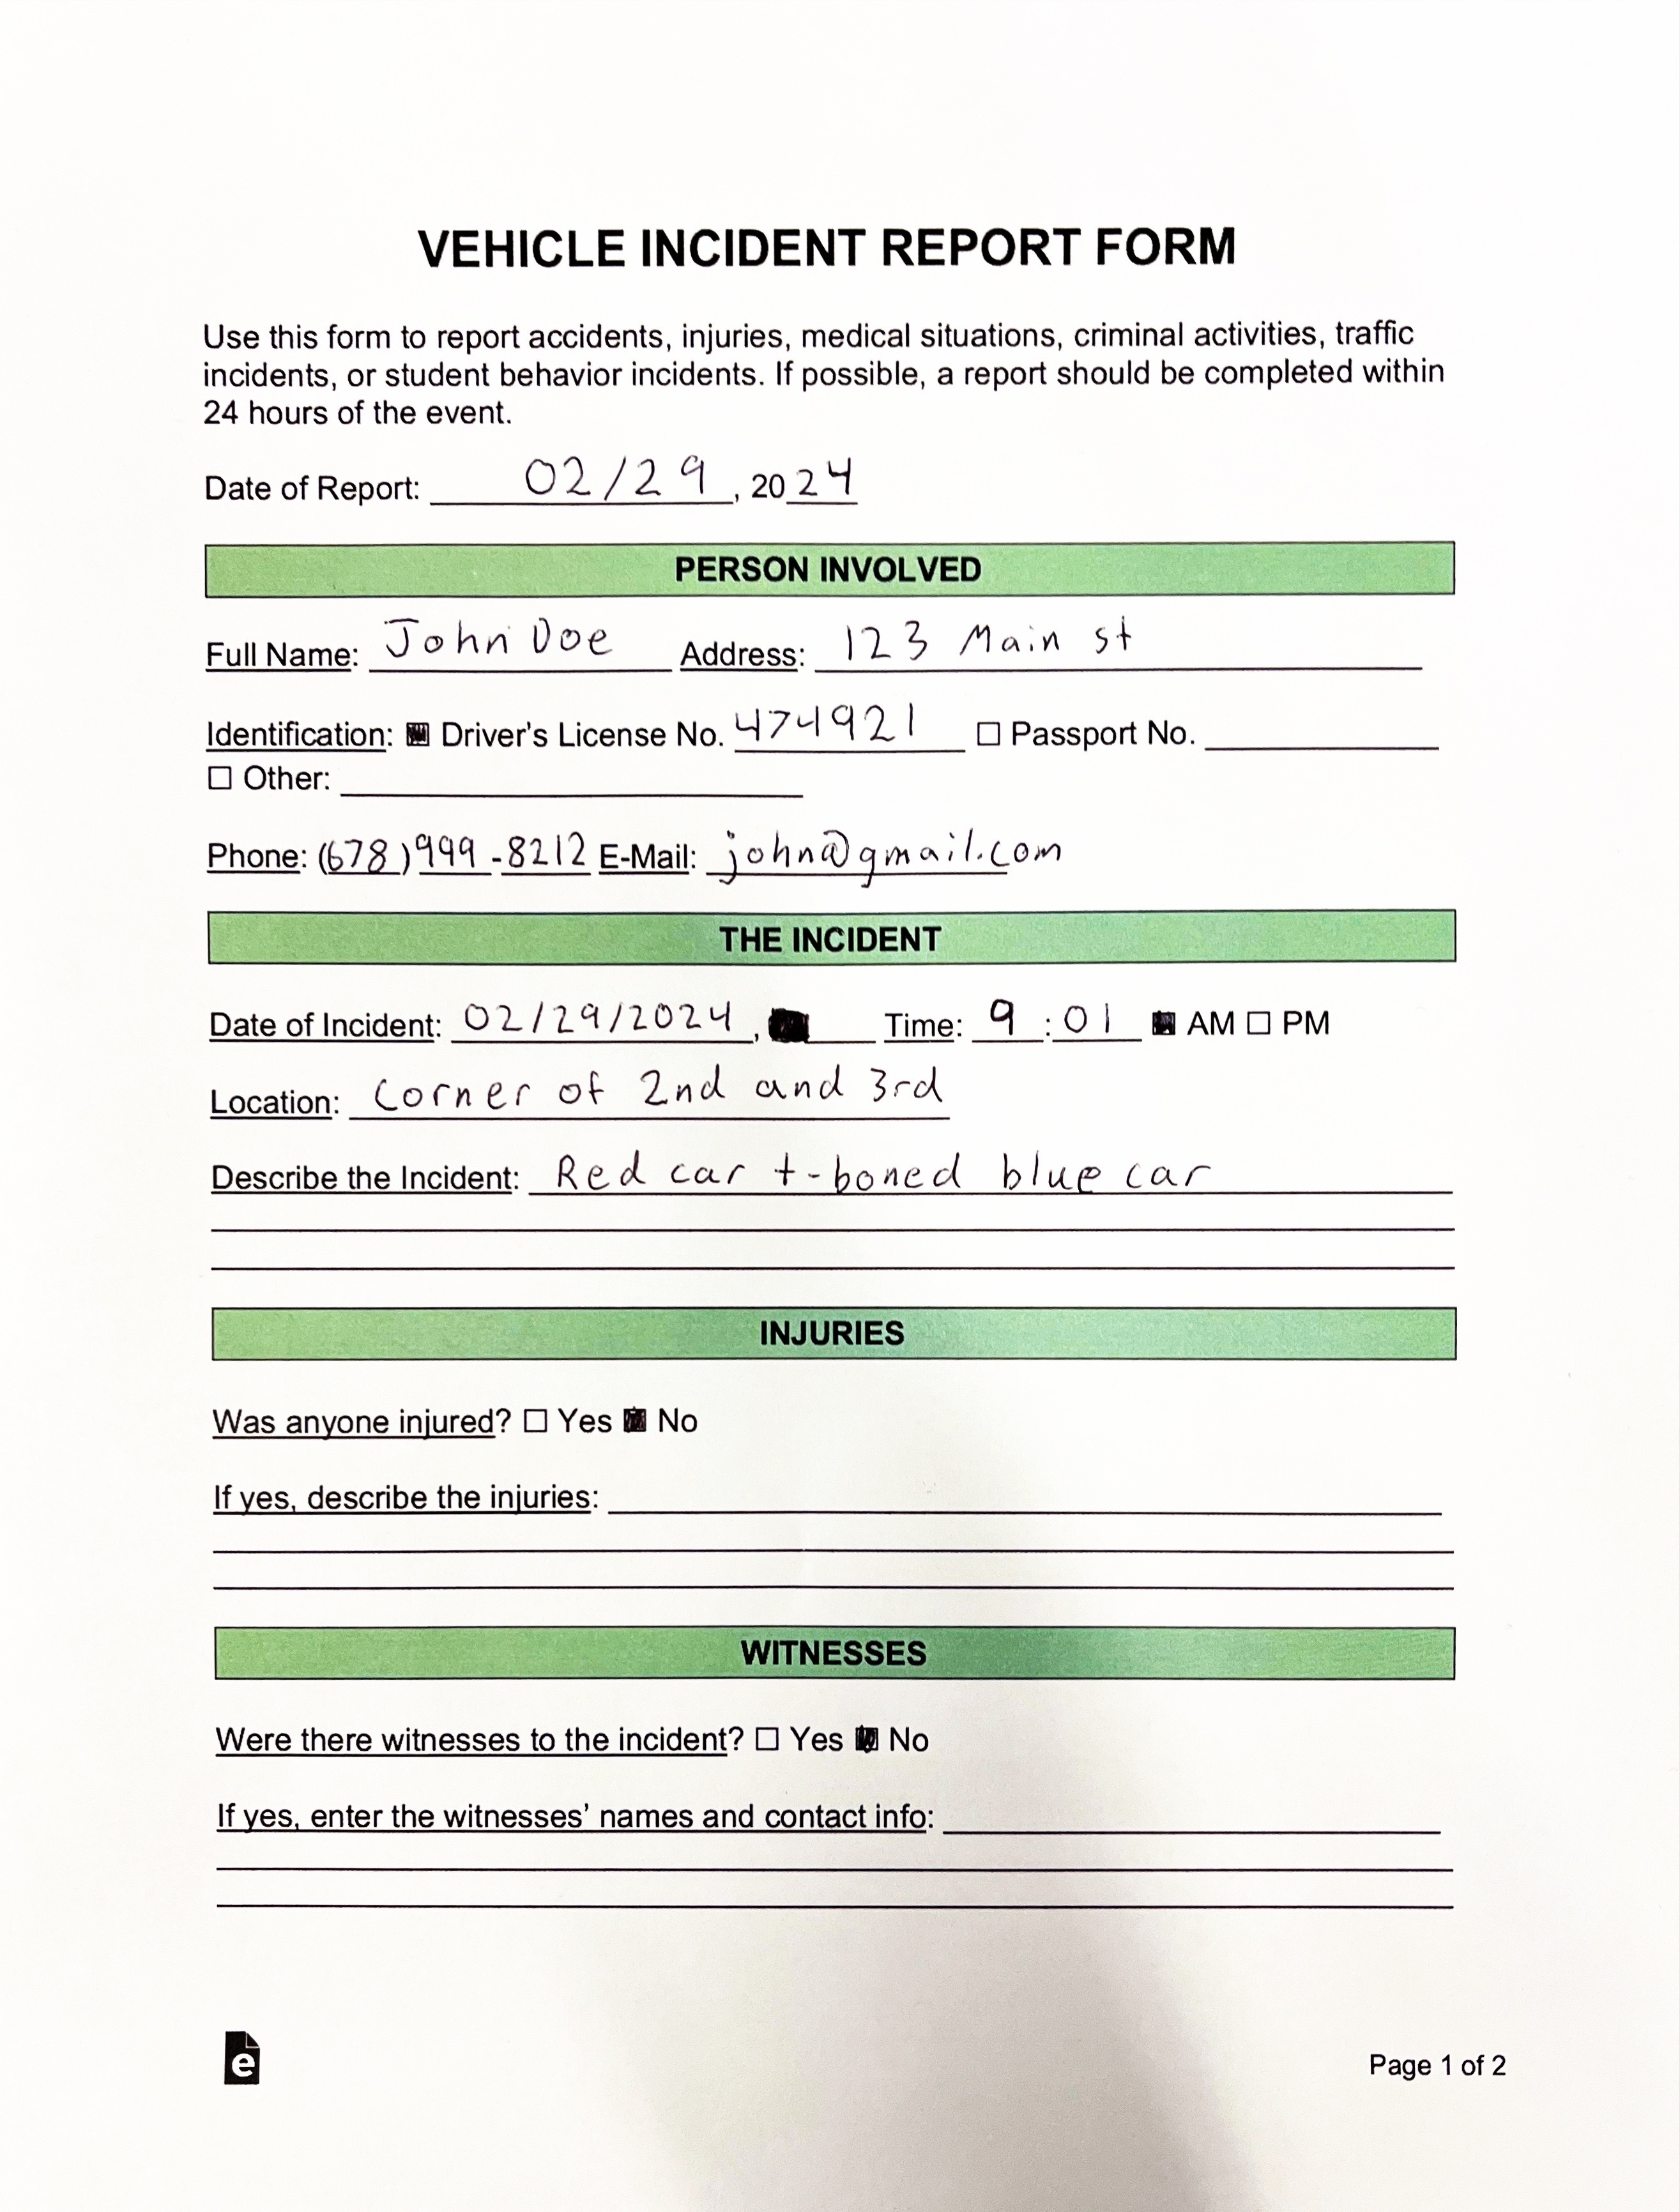

In [141]:
image_path = './images/transcribe/vehicle_form.jpg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [142]:
response_text = interactWithLLM("Transcribe this form exactly.",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 9.02 seconds.
response_text --- 
VEHICLE INCIDENT REPORT FORM

Use this form to report accidents, injuries, medical situations, criminal activities, traffic incidents, or student behavior incidents. If possible, a report should be completed within 24 hours of the event.

Date of Report: 02/29, 2024

PERSON INVOLVED

Full Name: John Doe   Address: 125 Main St

Identification: ☑ Driver's License No. 47492_1  ☐ Passport No. ____________
☐ Other: ________________________

Phone: (678) 999-8212 E-Mail: john@gmail.com

THE INCIDENT  

Date of Incident: 02/29/2024  ☑     Time: 9 :01  ☑ AM ☐ PM

Location: Corner of 2nd and 3rd  

Describe the Incident: Red car t-boned blue car

INJURIES

Was anyone injured? ☐ Yes ☑ No

If yes, describe the injuries: _________________________________________________
________________________________________________________________________
__________________________________________

### Complicated document QA

With Claude 3 we can go beyond just transcription and ask specific questions about our information in our unstructured documents.

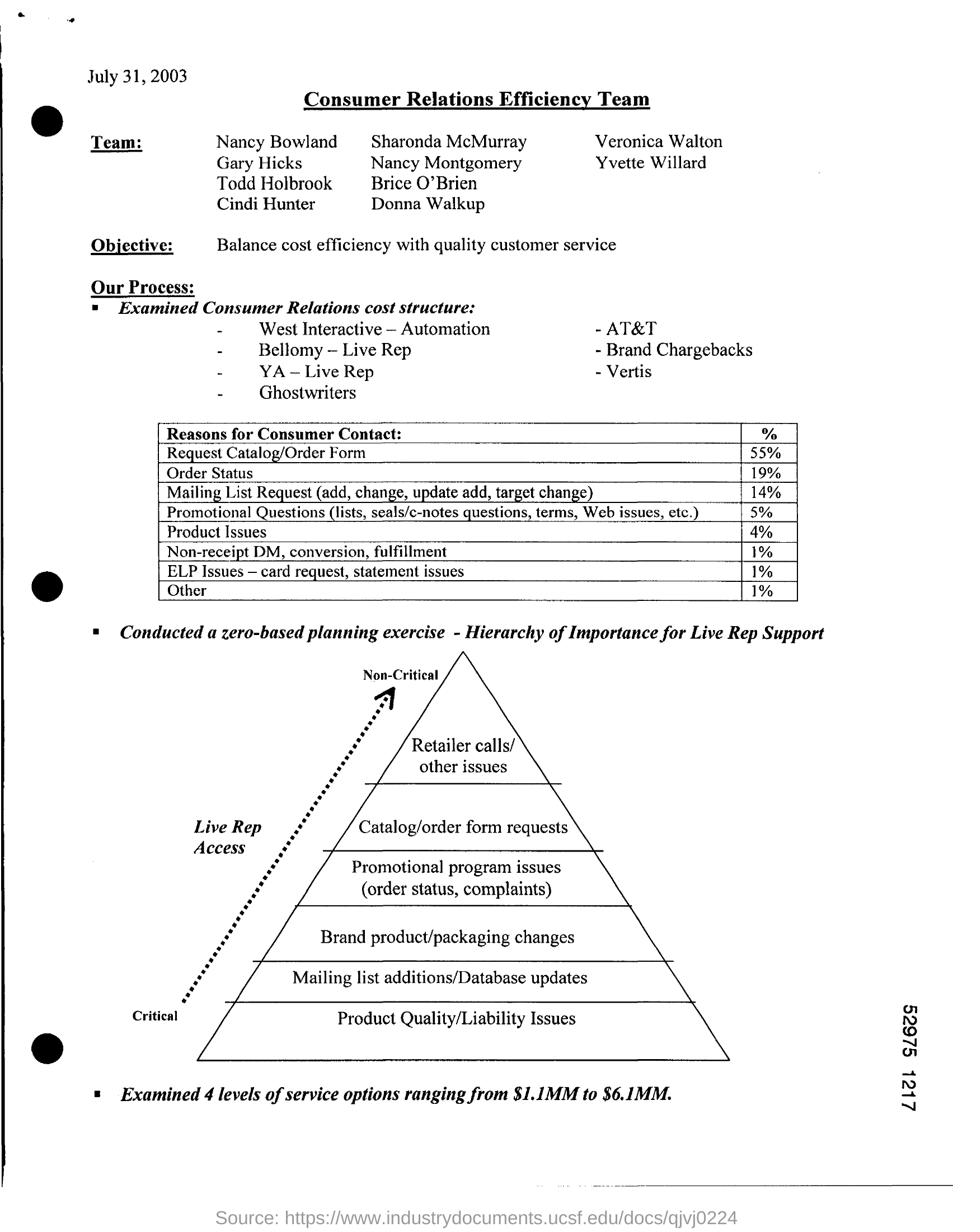

In [143]:
image_path = './images/transcribe/page.jpeg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [144]:
response_text = interactWithLLM("Which is the most critical issue for live rep support?",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 2.46 seconds.
response_text --- 
According to the hierarchy of importance pyramid shown in the image, the most critical issue for live representative support is "Product Quality/Liability Issues".


### Unstructured information -> JSON

Let's take a look at how you can use Claude to turn unstructured information in an image into a structured JSON output.

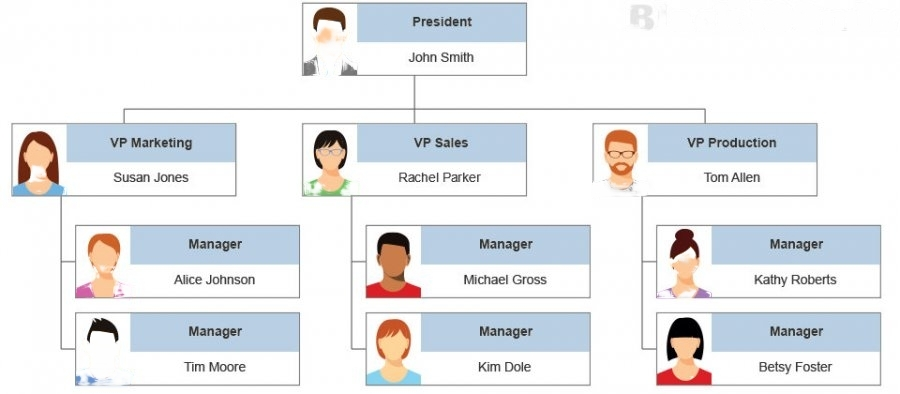

In [145]:
image_path = './images/transcribe/org_chart.jpeg'
base64_string = image_to_base64(image_path)
Image(filename=image_path) 

In [146]:
response_text = interactWithLLM("Turn this org chart into JSON indicating who reports to who. Only output the JSON and nothing else..",base64_string,llm_type)
print('response_text --- \n' + response_text)

**THE LLM TYPE IS -->anthropic.claude-3-sonnet
The runtime of the invoke_model was 4.11 seconds.
response_text --- 
{
  "name": "John Smith",
  "title": "President",
  "reports": [
    {
      "name": "Susan Jones",
      "title": "VP Marketing",
      "reports": [
        {
          "name": "Alice Johnson",
          "title": "Manager"
        },
        {
          "name": "Tim Moore",
          "title": "Manager"
        }
      ]
    },
    {
      "name": "Rachel Parker",
      "title": "VP Sales",
      "reports": [
        {
          "name": "Michael Gross",
          "title": "Manager"
        },
        {
          "name": "Kim Dole",
          "title": "Manager"
        }
      ]
    },
    {
      "name": "Tom Allen",
      "title": "VP Production",
      "reports": [
        {
          "name": "Kathy Roberts",
          "title": "Manager"
        },
        {
          "name": "Betsy Foster",
          "title": "Manager"
        }
      ]
    }
  ]
}
